<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-04-05 to 2021-04-05
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cash          366 non-null    float64
 1   AccountValue  366 non-null    float64
 2   Benchmark     366 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB
C:\Users\barne\GitHubRepos\StrategyBuilder.BFF\Reports\5cf90134-0b47-46f8-b5b3-58073d496d30.png


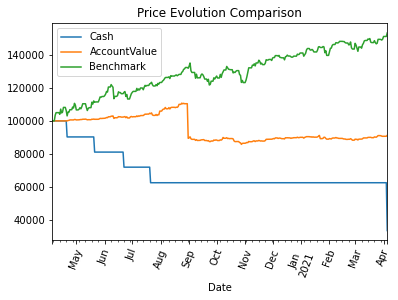

In [3]:
import sys
import json
import collections
import pandas as pd
from reportlab.platypus import Image
from types import SimpleNamespace
import matplotlib.pyplot as plt

# load input arguments from the text file
filename = sys.argv[ 1 ]
filename = "C:/Users/barne/GitHubRepos/StrategyBuilder.BFF/Scripts/3a551815-8aa6-4c3b-baf7-5cb4c55bc6a3.txt"
data = ''
with open( filename ) as data_file: 
    data = data_file.read()
    input_args = json.loads( data )

# read value from input args
filename, strategyname, strategydescription, symbolList, eventNames, executedon, executefrom, executeto, x, y = \
[ input_args.get( key ) for key in [ 'filename', 'strategyname', 'strategydescription', 'symbolList', 'eventNames', 'executedon', 'executefrom',  'executeto',  'x',  'y' ] ]

input_args = json.loads(data, object_hook=lambda d: SimpleNamespace(**d))


# input_args.accountPerformance
loaddata = json.loads( data )
df = pd.json_normalize(loaddata['accountPerformance'])
#df.set_index('Date')
df.index = pd.to_datetime(df["Date"])
df = df.drop(columns=["Date"])
df.info()
for i, col in enumerate(df.columns):
    df[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(df.columns)
plt.savefig(input_args.imagefilename, bbox_inches='tight')

    
print(input_args.imagefilename)
